In [1]:
#import libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
#load data
spam = pd.read_csv('https://raw.githubusercontent.com/PriyaShaji/Data620/master/Week%205/spam.csv', header=None)

#load column titles
col_titles = pd.read_csv('https://raw.githubusercontent.com/PriyaShaji/Data620/master/Week%205/spam_column_names.csv', header=None)
col_titles.columns = ['attributes']
spam.columns = col_titles['attributes']

spam.head()

attributes,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# counting number of spam and not spam emails
spam['target'].value_counts()

0    2788
1    1813
Name: target, dtype: int64

In [5]:
#test set will be 30% of data and set a seed
test_size = 0.3
random_state = 512

#separate the target variable from the input variables
X = spam.loc[:,spam.columns != 'target']
y = spam.loc[:,spam.columns == 'target']

In [6]:
#split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [8]:
## Model 1: Decision Tree
## A decision tree is a model that is built based on sets of binary decisions.

model_dt = tree.DecisionTreeClassifier()
trained_dt = model_dt.fit(X_train, y_train)
pred_dt = trained_dt.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_dt.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_dt))
print('F1 Score: ', f1_score(y_test, pred_dt))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_dt))


Training Set Accuracy:  0.9996894409937889
Test Set Accuracy:  0.9196234612599565
F1 Score:  0.8925459825750243
Confusion Matrix 
 [[809  67]
 [ 44 461]]


In [9]:
## Model 2: Random Forest
## A random forest model is built using many decision trees. The result of the random forest model is determined by averaging the results of each decision tree in the forest.

model_rf = RandomForestClassifier()
trained_rf = model_rf.fit(X_train, y_train)
pred_rf = trained_rf.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_rf.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_rf))
print('F1 Score: ', f1_score(y_test, pred_rf))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_rf))

/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training Set Accuracy:  0.9996894409937889
Test Set Accuracy:  0.9587255611875453
F1 Score:  0.9438423645320196
Confusion Matrix 
 [[845  31]
 [ 26 479]]


In [10]:
## Model 3: Support Vector Machine
## A Support Vector Machine, SVM, is built by creating a series of linear separations between the variables in order to create a model to predict the target variable.

model_svm = LinearSVC()
trained_svm = model_svm.fit(X_train, y_train)
pred_svm = trained_svm.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_svm.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_svm))
print('F1 Score: ', f1_score(y_test, pred_svm))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_svm))

/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Set Accuracy:  0.843167701863354
Test Set Accuracy:  0.8298334540188269
F1 Score:  0.8049792531120332
Confusion Matrix 
 [[661 215]
 [ 20 485]]


In [11]:
## Model Selection
## Let's describe random forest model

model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

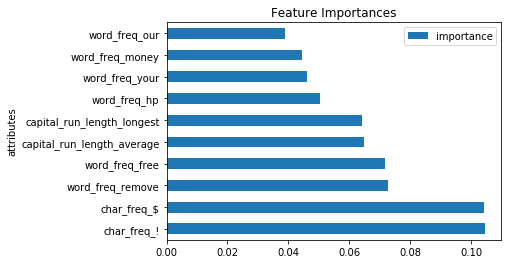

In [12]:
## Feature Importance
## The following are the 10 most significant variables being used in the random forest model.

feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                  index=X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances[:10]
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [13]:
## To validate this result, we will choose a different seed for splitting the training and testing set and re-run the model.

#test set will be 30% of data and set a seed

test_size = 0.3
random_state = 44

#separate the target variable from the input variables
X = spam.loc[:,spam.columns != 'target']
y = spam.loc[:,spam.columns == 'target']

#split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model_rf = RandomForestClassifier()
trained_rf = model_rf.fit(X_train, y_train)
pred_rf = trained_rf.predict(X_test)

print('Training Set Accuracy: ', accuracy_score(y_train, trained_rf.predict(X_train)))
print('Test Set Accuracy: ', accuracy_score(y_test, pred_rf))
print('F1 Score: ', f1_score(y_test, pred_rf))
print('Confusion Matrix \n', confusion_matrix(y_test, pred_rf))

/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Training Set Accuracy:  0.9993788819875776
Test Set Accuracy:  0.9572773352643013
F1 Score:  0.9462169553327255
Confusion Matrix 
 [[803  24]
 [ 35 519]]
